### Name :Harsh Arora
### Roll No : AE-1218
### BSc(Hons) Computer Science

In [1]:
import PyPDF2
import nltk
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
def pdf_to_text(pdf_file):
    with open(pdf_file, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text


In [3]:
def preprocess_text(text):
    # Lowercase and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize and remove stop words
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    
    # Stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in words]
    
    return ' '.join(stemmed_words)


In [4]:
def compute_idf_and_store_tokens(documents):
    # Using TfidfVectorizer to compute IDF scores
    vectorizer = TfidfVectorizer(use_idf=True)
    vectorizer.fit_transform(documents)
    idf_scores = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
    
    # Write tokens and IDF values to a file
    with open("idf_tokens.txt", "w") as f:
        for word, idf in idf_scores.items():
            f.write(f"{word}: {idf}\n")
    return idf_scores


In [5]:
def compute_tfidf_for_single_doc(document):
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    # Transform the single document into TF-IDF
    tfidf_matrix = vectorizer.fit_transform([document])
    
    # Convert the matrix to a dense format and extract feature names
    tfidf_dense = tfidf_matrix.todense()
    feature_names = vectorizer.get_feature_names_out()
    
    # Create a dictionary of tokens and their TF-IDF scores
    tfidf_dict = {feature_names[i]: tfidf_dense[0, i] for i in range(tfidf_dense.shape[1])}
    
    return tfidf_dict

In [6]:
def compute_similarity_matrix(documents):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return similarity_matrix

def get_top_related_docs(similarity_matrix, doc_index, doc_names, top_n=5):
    similarities = similarity_matrix[doc_index]
    related_docs_indices = np.argsort(similarities)[-top_n-1:-1][::-1]
    
    related_docs = [(doc_names[i], similarities[i]) for i in related_docs_indices]
    return related_docs


In [7]:
main_pdf = 'Harry Potter and the Sorcerers Stone.pdf'
main_text = pdf_to_text(main_pdf)
main_text_processed = preprocess_text(main_text)
main_pdf_tfidf = compute_tfidf_for_single_doc(main_text_processed)
main_text

'1Harry Potter and the Sorcerer\'s Stone\nCHAPTER ONE\nTHE BOY WHO LIVEDMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much. They were the last\npeople you\'d expect to be involved in anything strange or mysterious,because they just didn\'t hold with such nonsense.\nMr. Dursley was the director of a firm called Grunnings, which made\ndrills. He was a big, beefy man with hardly any neck, although he did\nhave a very large mustache. Mrs. Dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as shespent so much of her time craning over garden fences, spying on theneighbors. The Dursleys had a small son called Dudley and in theiropinion there was no finer boy anywhere.\nThe Dursleys had everything they wanted, but they also had a secret, and\ntheir greatest fear was that somebody would discover it. They didn\'tthink they could bear it if anyone found out about the Potters

In [8]:
main_text_processed

'1harri potter sorcer stone chapter one boy livedmr mr dursley number four privet drive proud say perfectli normal thank much last peopl youd expect involv anyth strang mysteriousbecaus didnt hold nonsens mr dursley director firm call grun made drill big beefi man hardli neck although larg mustach mr dursley thin blond nearli twice usual amount neck came use shespent much time crane garden fenc spi theneighbor dursley small son call dudley theiropinion finer boy anywher dursley everyth want also secret greatest fear somebodi would discov didntthink could bear anyon found potter mrspotter mr dursley sister hadnt met sever yearsin fact mr dursley pretend didnt sister hersist goodfornoth husband undursleyish wasposs dursley shudder think neighbor would say potter arriv street dursley knew potter small son never even seen boywa anoth good reason keep potter away didnt wantdudley mix child like mr mr dursley woke dull gray tuesday stori start noth cloudi sky outsid suggest strang mysteri th

In [9]:
main_pdf_tfidf

{'119professor': 0.00047002887920301074,
 '1473': 0.00047002887920301074,
 '1637': 0.00047002887920301074,
 '169you': 0.00047002887920301074,
 '17': 0.00047002887920301074,
 '1709': 0.00047002887920301074,
 '171i': 0.00047002887920301074,
 '1945': 0.00047002887920301074,
 '195dont': 0.00047002887920301074,
 '1harri': 0.00047002887920301074,
 '214whatev': 0.00047002887920301074,
 '31': 0.0009400577584060215,
 '382': 0.00047002887920301074,
 '42well': 0.00047002887920301074,
 '50cours': 0.00047002887920301074,
 '90': 0.00047002887920301074,
 '99i': 0.00047002887920301074,
 'a116broomstick': 0.00047002887920301074,
 'a11headlight': 0.00047002887920301074,
 'a14good': 0.00047002887920301074,
 'a176legendari': 0.00047002887920301074,
 'a23clos': 0.00047002887920301074,
 'a57vast': 0.00047002887920301074,
 'aaaaaaaaaarghmalfoy': 0.00047002887920301074,
 'aaaargh': 0.00047002887920301074,
 'aargh': 0.00047002887920301074,
 'aback': 0.00047002887920301074,
 'abbott': 0.00047002887920301074,
 '

In [10]:
pdf_files = [
    'harry-potter-and-the-deathly-hallows-j.k.-rowling.pdf', 
    'harry-potter-and-the-goblet-of-fire.pdf',
    'harry-potter-and-the-half-blood-prince-j.k.-rowling.pdf', 
    'Unit 1.pdf',
    '2-India-Country-Context.pdf',
    'cricket_tutorial.pdf',
    'cybersecuirty_sb_factsheets_all.pdf',
    'A_Brief_Introduction_To_AI.pdf'
]


documents = [main_text_processed]


for pdf_file in pdf_files:
    text = pdf_to_text(pdf_file)
    processed_text = preprocess_text(text)  
    documents.append(processed_text)


compute_idf_and_store_tokens(documents)  


similarity_matrix = compute_similarity_matrix(documents)


top_related_docs = get_top_related_docs(similarity_matrix, doc_index=0, doc_names=['Harry Potter and the Sorcerers Stone.pdf'] + pdf_files)


print("Top 5 related documents to 'Harry Potter and the Sorcerer's Stone.pdf':")
for doc, score in top_related_docs:
    print(f"{doc}: {score:.2f}")

Top 5 related documents to 'Harry Potter and the Sorcerer's Stone.pdf':
harry-potter-and-the-half-blood-prince-j.k.-rowling.pdf: 0.85
harry-potter-and-the-deathly-hallows-j.k.-rowling.pdf: 0.83
harry-potter-and-the-goblet-of-fire.pdf: 0.78
cybersecuirty_sb_factsheets_all.pdf: 0.07
A_Brief_Introduction_To_AI.pdf: 0.07


### Q2.Perform CluStream algorithm on any time series data from Kaggle and compare its output with that of K-means clustering. Evaluate the cluster quality by changing the algorithm's parameters  

Download CluStream from github and run it to produce the results 

Data Preview:
          Date    Asset   Price
0  2023-07-10   Bond B  385.64
1  2023-03-03  Stock B  297.20
2  2023-09-13   Bond B   75.98
3  2023-01-07   Bond B  356.34
4  2023-06-04  Stock A  260.05


C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clustering Results Preview:
    Asset   Price  year  month  day  CluStream Cluster  KMeans Cluster
0      1  385.64  2023      7   10                  0               1
1      4  297.20  2023      3    3                  0               0
2      1   75.98  2023      9   13                  1               1
3      1  356.34  2023      1    7                  0               2
4      3  260.05  2023      6    4                  0               1


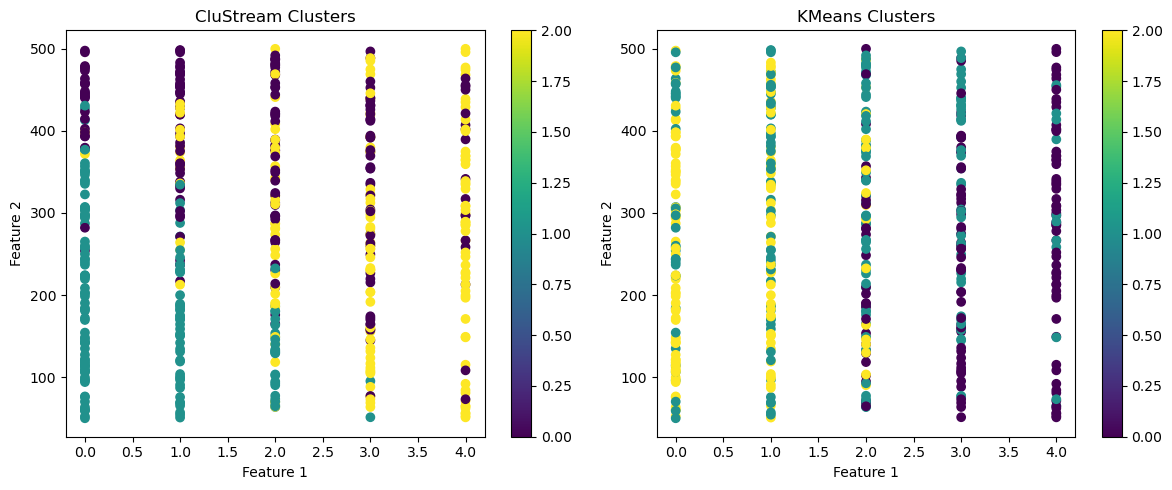

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("financial_portfolio_data.csv")

# Check the structure of the data
print("Data Preview:\n", data.head())

# Convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract features from the date (e.g., year, month, day)
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

# Drop the original date column if it's no longer needed
data = data.drop(columns=['Date'])

# Label encode categorical columns
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Select features for clustering
X = data.iloc[:, :5]  # Adjust this range based on your data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define MicroCluster for CluStream
class MicroCluster:
    def __init__(self, centroid, weight):
        self.centroid = centroid
        self.weight = weight

    def update(self, point, decay_factor=0.9):
        # Apply a decay factor to gradually reduce the importance of older data
        self.weight *= decay_factor
        self.weight += 1
        self.centroid = ((self.centroid * (self.weight - 1)) + point) / self.weight

# Define CluStream Class
class CluStream(BaseEstimator, ClusterMixin):
    def __init__(self, nb_initial_points=100, time_window=1000, nb_micro_cluster=10, nb_macro_cluster=3):
        self.nb_initial_points = nb_initial_points
        self.time_window = time_window
        self.nb_micro_cluster = nb_micro_cluster
        self.nb_macro_cluster = nb_macro_cluster
        self.micro_clusters = []  # List to hold the micro-clusters
        self.timestamp = 0

    def fit(self, X):
        # Create initial micro-clusters with KMeans
        initial_kmeans = KMeans(n_clusters=self.nb_micro_cluster, random_state=0)
        initial_labels = initial_kmeans.fit_predict(X)
        
        for i in range(self.nb_micro_cluster):
            # Initialize micro-clusters with centroids and weights
            cluster_points = X[initial_labels == i]
            centroid = np.mean(cluster_points, axis=0)
            weight = len(cluster_points)
            self.micro_clusters.append(MicroCluster(centroid, weight))
        
        self.timestamp = len(X)
    
    def partial_fit(self, point):
        # Increment the timestamp for the incoming point
        self.timestamp += 1
        
        # Apply decay based on time window
        decay_factor = np.exp(-1 / self.time_window)
        
        # Find the closest micro-cluster to the new point
        distances = [distance.euclidean(micro_cluster.centroid, point) for micro_cluster in self.micro_clusters]
        closest_cluster = np.argmin(distances)
        
        # Update the closest micro-cluster
        self.micro_clusters[closest_cluster].update(point, decay_factor)
    
    def predict(self, X):
        # Macro-cluster formation using KMeans on current micro-clusters
        micro_centroids = np.array([mc.centroid for mc in self.micro_clusters])
        macro_kmeans = KMeans(n_clusters=self.nb_macro_cluster, random_state=0)
        macro_labels = macro_kmeans.fit_predict(micro_centroids)
        
        # Assign points in X to the closest macro-cluster
        predictions = []
        for x in X:
            distances = [distance.euclidean(macro_kmeans.cluster_centers_[i], x) for i in range(self.nb_macro_cluster)]
            predictions.append(np.argmin(distances))
        
        return np.array(predictions)

# Instantiate and fit the CluStream model
clu_stream = CluStream(nb_initial_points=100, time_window=1000, nb_micro_cluster=10, nb_macro_cluster=3)
clu_stream.fit(X_scaled)

# Use partial_fit to simulate streaming data
for i in range(X_scaled.shape[0]):
    clu_stream.partial_fit(X_scaled[i])

# Predict clusters using CluStream
predicted_clusters_clustream = clu_stream.predict(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
predicted_clusters_kmeans = kmeans.fit_predict(X_scaled)

# Create a DataFrame to compare results
results_df = pd.DataFrame(X, columns=data.columns[:5])  # Adjust based on your data
results_df['CluStream Cluster'] = predicted_clusters_clustream
results_df['KMeans Cluster'] = predicted_clusters_kmeans

# Show the first few rows of the results
print("Clustering Results Preview:\n", results_df.head())

# Visualization of CluStream and KMeans Clusters
plt.figure(figsize=(12, 5))

# CluStream Clusters
plt.subplot(1, 2, 1)
plt.scatter(results_df.iloc[:, 0], results_df.iloc[:, 1], c=results_df['CluStream Cluster'], cmap='viridis')
plt.title('CluStream Clusters')
plt.xlabel('Feature 1')  # Update these labels based on your data
plt.ylabel('Feature 2')
plt.colorbar()

# KMeans Clusters
plt.subplot(1, 2, 2)
plt.scatter(results_df.iloc[:, 0], results_df.iloc[:, 1], c=results_df['KMeans Cluster'], cmap='viridis')
plt.title('KMeans Clusters')
plt.xlabel('Feature 1')  # Update these labels based on your data
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()
